In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 

        # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/arketing-campaign/marketing_campaign.csv
/kaggle/input/arketing-campaign/marketing_campaign.xlsx


In [2]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import mannwhitneyu, chi2_contingency

# Objective
Building a predictive model to identify customers most likely to accept a future marketing campaign, enabling targeted outreach that maximizes profit and reduces unnecessary marketing costs.

In [3]:
df = pd.read_excel('/kaggle/input/arketing-campaign/marketing_campaign.xlsx')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


# Data Preprocessing

In [4]:
print("Shape of the dataset -")
df.shape

Shape of the dataset -


(2240, 29)

In [5]:
print("Head of the dataset -")
df.head()

Head of the dataset -


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [6]:
print("Information about the dataframe -")
print(df.info())

Information about the dataframe -
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumD

In [7]:
print('Statistical summary of the dataset -')
df.describe()


Statistical summary of the dataset -


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
print("The datatypes  in the dataset -")
df.dtypes

The datatypes  in the dataset -


ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

## Data Cleaning

### Null Values
Checking for Null values in the dataset

In [9]:
print("Number of null values in the dataset")
print(df.isnull().sum())

Number of null values in the dataset
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Since the number of missing values in the dataset is low, decided to drop the vlaues

In [10]:
df = df.dropna()

In [11]:
print(df.isnull().sum())


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64


In [12]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## feature engineering

### Creating Age

In [13]:
df.loc[:,"Age"] = (2025 - df['Year_Birth'])

/tmp/ipykernel_17/2594963826.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"Age"] = (2025 - df['Year_Birth'])


### Creating Total Spent
Creating the overall money spent by each customer across all the products

In [14]:
df.loc[:,'Total_Spent'] = df[["MntWines",'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 1)

/tmp/ipykernel_17/3811346626.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Total_Spent'] = df[["MntWines",'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 1)


### Creating Average Spent per Campaign

In [15]:
df.loc[:,'Avg_Spent'] = df[["MntWines",'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 1)/df['NumDealsPurchases']

/tmp/ipykernel_17/2149510525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Avg_Spent'] = df[["MntWines",'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis = 1)/df['NumDealsPurchases']


### Creating Has_Children
to see if the customer has a kid or not

In [16]:
df.loc[:,'Has_Children'] = (df['Kidhome']+df['Teenhome']>0).astype(int)

/tmp/ipykernel_17/2204679412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Has_Children'] = (df['Kidhome']+df['Teenhome']>0).astype(int)


### Creating Education Level

In [17]:
def education_level(education):
    if education in ["Graduation","phD","Master"]:
        return "High"
    elif education in ["Basic"]:
        return "Middle"
    else:
        return "Low"
    
df.loc[:,"Education_Level"] = df["Education"].apply(education_level)

/tmp/ipykernel_17/4268284709.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,"Education_Level"] = df["Education"].apply(education_level)


In [18]:
df[["Education_Level"]].isna().sum()


Education_Level    0
dtype: int64

In [19]:
df["Education_Level"].value_counts()


Education_Level
High      1481
Low        681
Middle      54
Name: count, dtype: int64

### Creating Total Campaigns Accepted


In [20]:
df.loc[:,'Total_Past_Acceptances'] = df[
    ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis = 1)

/tmp/ipykernel_17/1859252603.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:,'Total_Past_Acceptances'] = df[


### Dropping Irrelevant Columns

In [21]:
drop = ['Z_CostContact','Z_Revenue','ID','Year_Birth','Dt_Customer']
df = df.drop(drop, axis = 1)

## Exploratory Data Analysis

### Checking for outliers

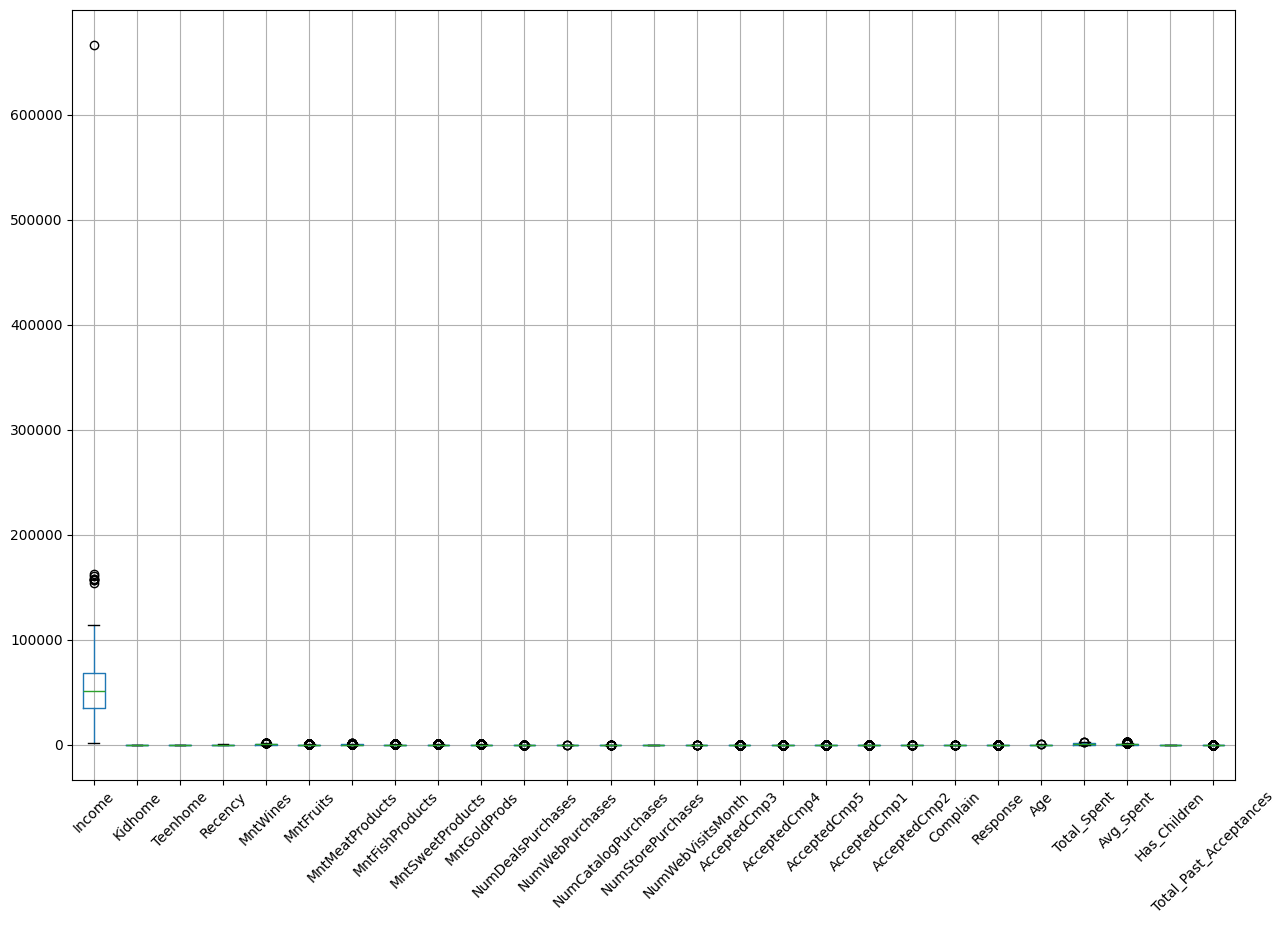

In [22]:
fig, ax = plt.subplots(figsize=(15, 10))
df.boxplot(ax=ax)
plt.xticks(rotation = 45)
plt.show()

there seems to be a substantial skew in the income boxplot

In [23]:
income = df['Income']

# Calculate quartiles
Q1 = income.quantile(0.25)
Q3 = income.quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate upper fence
upper_fence = Q3 + 1.5 * IQR

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Upper fence: {upper_fence}\n")

income_outliers = income[income > upper_fence]

print("Income values above the upper fence:")
print(income_outliers.sort_values(ascending=False))

Q1: 35303.0
Q3: 68522.0
IQR: 33219.0
Upper fence: 118350.5

Income values above the upper fence:
2233    666666.0
617     162397.0
687     160803.0
1300    157733.0
164     157243.0
1653    157146.0
2132    156924.0
655     153924.0
Name: Income, dtype: float64


There seems to be 8 outliers above the upper fence of 118k, but it is not impossible to have an income of more than 150k. We will remove the income that is at 666k to remove any massive skews taht this data point may cause.

In [24]:
df = df.drop(df[df['Income'] == 666666.0].index)
print('confirming that the row was dropped -')
(df['Income'] == 666666.0).sum()

confirming that the row was dropped -


np.int64(0)

### Log Transforming Income
doing this to prevent any massive skews in the model

In [25]:
df["Log_Income"] = np.log(df["Income"])

### Distribution of Income

In [26]:
fig = px.histogram(df, x = 'Income', nbins = 50)
fig.show()

### Age Distribution

In [27]:
fig = px.histogram(df,x='Age', nbins = 50)
fig.show()

There seems to be some customers with ages above 120 which seems like an unlikely so we remove any ages above 100

In [28]:
df = df.loc[df["Age"] <= 100]

### class distribution
Checking for class imabalance

In [29]:
df['Response'].value_counts(normalize = True)

Response
0    0.849458
1    0.150542
Name: proportion, dtype: float64

15% positive and 85% negative, there is heavy class imbalance, Need to Stratify split to keep class proportions equal for the training, testing and vlaidation split.

### Spending by Income
how much does Income affect the Spending


In [30]:
fig= px.scatter(df, x='Avg_Spent', y= 'Income')
fig.show()

Spending seems to be positively correlated with income

### Acceptance of Campaigns

In [31]:
campaign_cols = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']

In [32]:
acceptance = {}
for cols in campaign_cols:
    pos_count = (df[cols]==1).sum()
    total_customers = df.shape[0]
    Acceptance_Rate = (pos_count/total_customers)*100
    acceptance[cols] = Acceptance_Rate
    print(f"Acceptance Rate for {cols} =", Acceptance_Rate)

Acceptance Rate for AcceptedCmp1 = 6.419529837251356
Acceptance Rate for AcceptedCmp2 = 1.3562386980108498
Acceptance Rate for AcceptedCmp3 = 7.368896925858952
Acceptance Rate for AcceptedCmp4 = 7.414104882459313
Acceptance Rate for AcceptedCmp5 = 7.2784810126582276


In [33]:
fig = px.bar(
    x=list(acceptance.keys()),
    y=list(acceptance.values()),
    labels={
        "x": "Campaign",
        "y": "Acceptance Rate"
    }
)
fig.update_layout(
    title="Campaign Acceptance Rates"
)
fig.show()

it seems that that most of the campaigns had consistent preformance among the customers but the second campaign performed poorly this might be due to campaign stratergy.

### Education distribution by income level

In [34]:
fig = px.histogram(
    df,
    x="Income",
    color="Education",
    nbins=30,
    )
fig.show()

The Lower income feilds seems to be generally represented by the Basic Diploma and 2n cycle education, while the higher incomed individuals seems to be holders of a higher education degree like Graduation Degree, Masters Degree, or a PhD.

### Spending by education level

In [35]:
fig = px.box(
    df,
    x="Education",
    y="Total_Spent",
)
fig.show()


seems like the total amount spend is correlated to the education level, showing higher educated people spending more in the campign and lower educated people not spending as much

### How having kids affected the total spending of an individual

In [36]:
fig = px.box(
    df,
    x="Has_Children",
    y="Total_Spent",
)
fig.show()


The mean spending by customers with kids is way lower than the mean spending of individuals without kids,


### Average Spending by Martial Status

In [37]:
df_plot = df.groupby(['Marital_Status'])['Avg_Spent'].mean().reset_index()

fig4 = px.bar(df_plot, x='Marital_Status', y='Avg_Spent', color='Marital_Status')

fig4.show()

### Spending by Product type

In [38]:
product_cols = [
    'MntWines',
    'MntMeatProducts',
    'MntFishProducts',
    'MntFruits',
    'MntSweetProducts',
    'MntGoldProds'
]

do customers who accept campaigns spend more on certain products

In [39]:
avg_spending_by_response = (
    df
    .groupby('Response')[product_cols]
    .mean()
    .T  # transpose for easier plotting
)

avg_spending_by_response

Response,0,1
MntWines,270.316658,502.615616
MntMeatProducts,144.569452,293.765766
MntFishProducts,35.155934,51.714715
MntFruits,24.271953,37.939940
MntSweetProducts,25.039383,38.372372
MntGoldProds,40.855242,61.252252


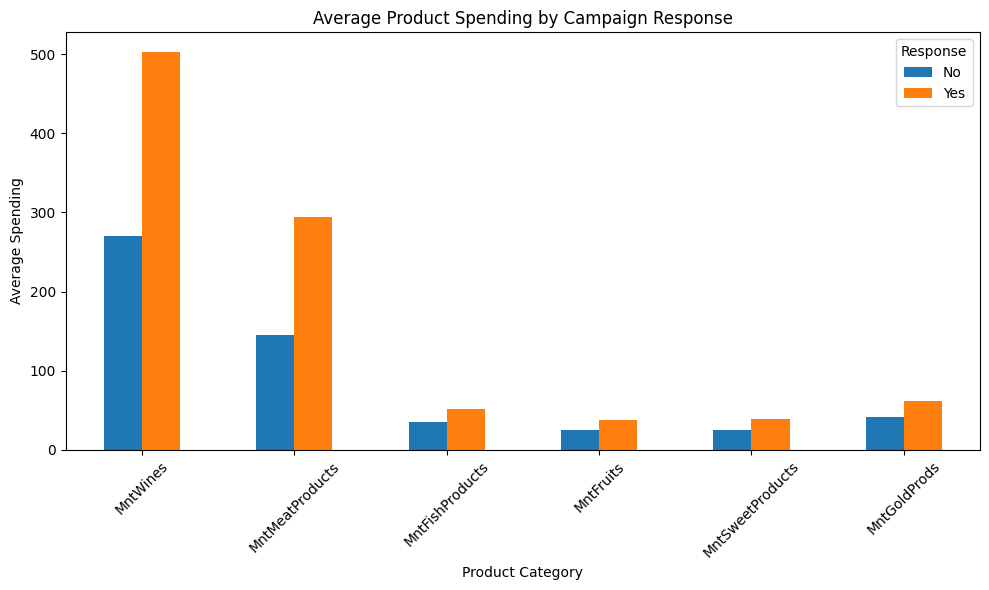

In [40]:
avg_spending_by_response.plot(
    kind='bar',
    figsize=(10, 6)
)

plt.title('Average Product Spending by Campaign Response')
plt.xlabel('Product Category')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.legend(title='Response', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()

Most customers who accept the products accept wine adn meat products followed by the rest, the least accepted porduct is the fruits product.

### Mean purchase per channel by response

In [41]:
channels = [
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases"
]

mean_purchases = (
    df.groupby("Response")[channels]
      .mean()
      .reset_index()
)

mean_purchases

,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
0,0,3.913784,2.401277,5.757850
1,1,5.072072,4.201201,6.081081


In [42]:
# reshaping to the long format
mean_long = mean_purchases.melt(
    id_vars="Response",
    value_vars=channels,
    var_name="Channel",
    value_name="MeanPurchases"
)

In [43]:
fig = px.bar(
    mean_long,
    x="Channel",
    y="MeanPurchases",
    color="Response",
    barmode="group",
    labels={
        "Channel": "Purchase Channel",
        "MeanPurchases": "Mean Number of Purchases",
        "Response": "Campaign Response"
    },
    title="Mean Purchases per Channel by Campaign Response"
)

fig.show()


Across all three channels the reposnse segment is taller than the non-responders segment, customers prefer the store channel.


### Correlation Matrix

In [44]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=['int64', 'float64'])
numeric_df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Age', 'Total_Spent',
       'Avg_Spent', 'Has_Children', 'Total_Past_Acceptances', 'Log_Income'],
      dtype='object')

In [45]:
corr_matrix = numeric_df.corr()
corr_matrix

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Spent,Avg_Spent,Has_Children,Total_Past_Acceptances,Log_Income
Income,1.000000,-0.514523,0.034565,0.007965,0.688209,0.507354,0.692279,0.520040,0.523599,0.388299,...,0.327524,0.104036,-0.027900,0.161387,0.199977,0.792740,0.733732,-0.403132,0.365986,0.939245
Kidhome,-0.514523,1.000000,-0.039066,0.010623,-0.497203,-0.373258,-0.439031,-0.388643,-0.377843,-0.354922,...,-0.174261,-0.081911,0.037067,-0.077901,-0.237497,-0.557949,-0.505788,0.520355,-0.211343,-0.462076
Teenhome,0.034565,-0.039066,1.000000,0.014392,0.003945,-0.175905,-0.261134,-0.205235,-0.163107,-0.018579,...,-0.145198,-0.015633,0.007746,-0.154402,0.361932,-0.137964,-0.326952,0.587993,-0.129475,0.123046
Recency,0.007965,0.010623,0.014392,1.000000,0.015981,-0.005257,0.022914,0.000788,0.025244,0.018148,...,-0.021147,-0.001429,0.005713,-0.200114,0.015694,0.020479,0.019294,0.002189,-0.013471,0.008928
MntWines,0.688209,-0.497203,0.003945,0.015981,1.000000,0.385844,0.568081,0.396915,0.389583,0.391461,...,0.351610,0.206309,-0.036420,0.246320,0.164615,0.892996,0.717063,-0.341994,0.510349,0.637672
MntFruits,0.507354,-0.373258,-0.175905,-0.005257,0.385844,1.000000,0.546740,0.593038,0.571474,0.393459,...,0.192417,-0.009924,-0.002956,0.123007,0.013447,0.612129,0.584259,-0.410657,0.155811,0.448013
MntMeatProducts,0.692279,-0.439031,-0.261134,0.022914,0.568081,0.546740,1.000000,0.572986,0.534624,0.357556,...,0.313379,0.043549,-0.021017,0.237966,0.033622,0.845543,0.832248,-0.574147,0.306383,0.572519
MntFishProducts,0.520040,-0.388643,-0.205235,0.000788,0.396915,0.593038,0.572986,1.000000,0.583484,0.426299,...,0.261712,0.002322,-0.019098,0.108135,0.041154,0.641884,0.611619,-0.449596,0.175376,0.461270
MntSweetProducts,0.523599,-0.377843,-0.163107,0.025244,0.389583,0.571474,0.534624,0.583484,1.000000,0.356754,...,0.245113,0.010142,-0.020569,0.116059,0.021516,0.606652,0.574259,-0.402064,0.200861,0.456199
MntGoldProds,0.388299,-0.354922,-0.018579,0.018148,0.391461,0.393459,0.357556,0.426299,0.356754,1.000000,...,0.170853,0.050976,-0.030166,0.141096,0.059779,0.527101,0.410809,-0.245380,0.195504,0.357447


In [46]:
response_corr = (
    corr_matrix['Response']
    .sort_values(ascending=False)
)
response_corr

Response                  1.000000
Total_Past_Acceptances    0.427297
AcceptedCmp5              0.324891
AcceptedCmp1              0.297212
Total_Spent               0.264443
AcceptedCmp3              0.253849
Avg_Spent                 0.250589
MntWines                  0.246320
MntMeatProducts           0.237966
NumCatalogPurchases       0.219912
AcceptedCmp4              0.180032
AcceptedCmp2              0.169234
Income                    0.161387
NumWebPurchases           0.151084
MntGoldProds              0.141096
Log_Income                0.129492
MntFruits                 0.123007
MntSweetProducts          0.116059
MntFishProducts           0.108135
NumStorePurchases         0.035563
NumDealsPurchases         0.003226
Complain                 -0.000145
NumWebVisitsMonth        -0.002625
Age                      -0.020937
Kidhome                  -0.077901
Teenhome                 -0.154402
Recency                  -0.200114
Has_Children             -0.203885
Name: Response, dtyp

Most of the Columns in the dataframe seem to have a positve correlation with the response, but some of the columns such as if the customer ahs complained or not, number of web visits a month, age and if there is a kid home have a negative correlation, ie if the vlaues of these columns are higher the chances of there being a response is lower.

There doesnt seem to be any feature that strongly affects the response, the closest featuer is if the customer has accepted the 5th campaign

In [47]:
fig = px.imshow(
    corr_matrix,
    color_continuous_scale="RdBu",
    zmin=-1,
    zmax=1,
    width =700,
    height = 700,
    title="Correlation Heatmap of Numeric Features"
)
fig.show()

- There is a positive corelation between the different prodcut types like MntWines, MntMeatProducts and the rest.
- there also seems to be a positive correlation between the purchase method and products which is to be expected.
- there is a negative correlation between the Num of web visits in a month and how much a customer spends, there also is a negative realtion between the amount spent by a customer and if they have a child or not

In [48]:
spending_cols = [
    'MntWines',
    'MntMeatProducts',
    'MntFishProducts',
    'MntFruits',
    'MntSweetProducts',
    'MntGoldProds'
]

spending_corr = df[spending_cols].corr()

spending_corr


,MntWines,MntMeatProducts,MntFishProducts,MntFruits,MntSweetProducts,MntGoldProds
MntWines,1.000000,0.568081,0.396915,0.385844,0.389583,0.391461
MntMeatProducts,0.568081,1.000000,0.572986,0.546740,0.534624,0.357556
MntFishProducts,0.396915,0.572986,1.000000,0.593038,0.583484,0.426299
MntFruits,0.385844,0.546740,0.593038,1.000000,0.571474,0.393459
MntSweetProducts,0.389583,0.534624,0.583484,0.571474,1.000000,0.356754
MntGoldProds,0.391461,0.357556,0.426299,0.393459,0.356754,1.000000


In [49]:
fig = px.imshow(
    spending_corr,
    color_continuous_scale="RdBu",
    zmin=-1,
    zmax=1,
    title="Correlation Heatmap of Numeric Features"
)
fig.show()

We can infer that customers who spend more on one product are willing to spend more on more categories of products.

Correlation analysis revealed strong positive correlations among individual product spending features, indicating multicollinearity.

# Statistical Hypothesis Testing

## Total Spending vs Response (Mann- Whitney U Test)

### Hypotheses

- $ H₀ $: Median total spending is the same for responders and non-responders
- $ H₁ $: Median total spending differs

In [50]:
responders = df[df['Response'] == 1]['Total_Spent']
non_responders = df[df['Response'] == 0]['Total_Spent']

stat, p_value = mannwhitneyu(responders, non_responders, alternative='two-sided')

print("Total Spending vs Response")
print(f"U statistic: {stat}")
print(f"P-value: {p_value}")


Total Spending vs Response
U statistic: 433053.0
P-value: 4.581853926738169e-29


- The p value is far below 0.05, so we reject the null hypothesis.
- Customers who accepted the campaign exhibit significantly differnt and typically higher sending behaviour
- The total spending is a strong discriminator between responders and non-responders

## Complaints vs Response (Chi-Squared Test)

### Hypotheses

- $H₀$: Complaint status and response are independent

- $H₁$: They are associated

In [51]:
contingency_table = pd.crosstab(df['Complain'], df['Response'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Complaints vs Response")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")


Complaints vs Response
Chi-square statistic: 0.0
P-value: 1.0


- Complain Status and Campaign response seem independent
- Complaining customers do not behave differently in terms of campaign response
- Excluding customers solely due to complaints would not imporve targeting

## Campaign Acceptance vs Response (Chi-Square test)

### Hypotheses

- $H₀$: Overall Campaign Acceptance is independent to response

- $H₁$: They are associated

In [52]:
df['Total_Past_Acceptances'] = df[
    ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
].sum(axis=1)

contingency_table = pd.crosstab(df['Total_Past_Acceptances'], df['Response'])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Total Past Acceptances vs Response")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")


Total Past Acceptances vs Response
Chi-square statistic: 404.9723249082988
P-value: 2.3437531345434965e-86


- The p value is extremely small so we reject the null hypothesis.
- customers who accepted previous campaigns are far more likely to accept again
- Campaign response shows behavioral momentum

## Receny vs Response (Mann-Whitney U Test)

### Hypotheses

- $H₀$: Median recency is the same for responders and non-responders

- $H₁$: Median recency differs

In [53]:
responders = df[df['Response'] == 1]['Recency']
non_responders = df[df['Response'] == 0]['Recency']

stat, p_value = mannwhitneyu(responders, non_responders, alternative='two-sided')

print("Recency vs Response")
print(f"U statistic: {stat}")
print(f"P-value: {p_value}")


Recency vs Response
U statistic: 211920.5
P-value: 5.6358573186378174e-21


- Customers who purchased more recently are significantly more likely to accept campaignd
- Engagement decays over time.

Statistical hypothesis testing revealed that total spending, prior campaign acceptance, and recency of purchase are all significantly associated with campaign response. In contrast, complaint history showed no statistically significant relationship with response behavior. These findings suggest that campaign targeting should focus on high-value, recently active customers with prior engagement history rather than relying on demographic or complaint-based exclusions.

# Model Training

In [54]:
# imports
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report

## Ordinal Encoding the Ordinal feature

In [55]:
education_map = {
    "Low": 1,
    "Middle": 2,
    "High": 3
}
df["Education_Level"] = df["Education_Level"].map(education_map)

## One Hot Encoding the categorical features

In [56]:
encoder = OneHotEncoder(
    drop="first",
    sparse_output=False,
    handle_unknown="ignore"
)

encoded = encoder.fit_transform(df[["Marital_Status"]])

encoded_df = pd.DataFrame(
    encoded,
    columns=encoder.get_feature_names_out(["Marital_Status"]),
    index=df.index
)

df = pd.concat([df.drop(columns=["Marital_Status"]), encoded_df], axis=1)


### Log Transforming Total_Spent
to prevent skew in the model

In [57]:
df["Log_Total_Spent"] = np.log1p(df["Total_Spent"])

## Dropping redundant columns

In [58]:
drop_cols = ['Response','Income','Education', 'Kidhome', 'Teenhome',
             'MntWines','MntFruits','MntMeatProducts','MntFishProducts',
             'MntSweetProducts','MntGoldProds','AcceptedCmp3','AcceptedCmp4',
             'AcceptedCmp5','AcceptedCmp1','AcceptedCmp2','Complain',
             'Avg_Spent','Total_Spent']

## Splitting Train and Test

In [59]:
target = "Response"
X = df.drop(columns = drop_cols)        
y = df[target]

In [60]:
X.head()

,Recency,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Has_Children,Education_Level,Total_Past_Acceptances,Log_Income,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Log_Total_Spent
0,58,3,8,10,4,7,68,0,3,0,10.970575,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7.388946
1,38,2,1,1,2,5,71,1,3,0,10.743847,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.332205
2,26,1,8,2,10,4,60,0,3,0,11.179032,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.655440
3,26,2,2,0,4,6,41,1,3,0,10.190394,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.988984
4,94,5,5,3,6,5,44,1,1,0,10.973237,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.047372


In [61]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Using stratify becasue of the class imbalance

In [62]:
model = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
        ("classifier", LogisticRegression(
            max_iter=1000,
            class_weight="balanced",
            solver="lbfgs"
        ))
    ]
)

In [63]:
model.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

# Model Evaluation

In [64]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"ROC-AUC: {roc_auc:.3f}")

ROC-AUC: 0.864


In [65]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.82      0.88       376
           1       0.43      0.75      0.54        67

    accuracy                           0.81       443
   macro avg       0.69      0.78      0.71       443
weighted avg       0.87      0.81      0.83       443

